In [90]:
import numpy as np
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="darkgrid")

import pandas_datareader.data as web
import datetime

In [21]:
START = datetime.datetime(2020, 1, 1)
END = datetime.datetime(2020, 4, 4)

In [35]:
SP500 = web.DataReader('^GSPC', 'yahoo', START, END)

In [139]:
feature_func_list = {
    'return': lambda _df: _df.loc[:, 'Adj Close'].pct_change(),
    'year': lambda _df: _df.index.year,
    'week': lambda _df: _df.index.week   
}
    
class Universe(object):
    def __init__(self, tickers, start, end):
        """
        Args:
            tickers - str. e.g. UVXY, ^GSPC 
            start - datetime. e.g. datetime.datetime(2020, 1, 1)
            end - datetime. e.g. datetime.datetime(2020, 1, 1)
        """
        self.start = start
        self.end = end
        self.dfs = {}
        self._tickers = set(tickers)
        self.load_tickers()
        
    def _add_features(self, df):
        for col_name, func in feature_func_list.items():
            df[col_name] = func(df)
            
        return df
        
    def load_tickers(self):
        for ticker in self._tickers:
            df = self._fetch_data(ticker)
            
            # update df with more features            
            self.dfs[ticker] = self._add_features(df)
        
    def _fetch_data(self, ticker):
        return web.DataReader(
            ticker, 'yahoo', self.start, self.end)
        
    def add(self, ticker):
        self._tickers.add(ticker)
    
    def __getitem__(self, item):
        return self.dfs[item]
    
    def __str__(self):
        return ",".join(self.dfs.keys())
            
universe = Universe(
    ['UVXY', '^GSPC', 'SPXU', 'UPRO', 'TQQQ', 'SQQQ'],
    START, END)

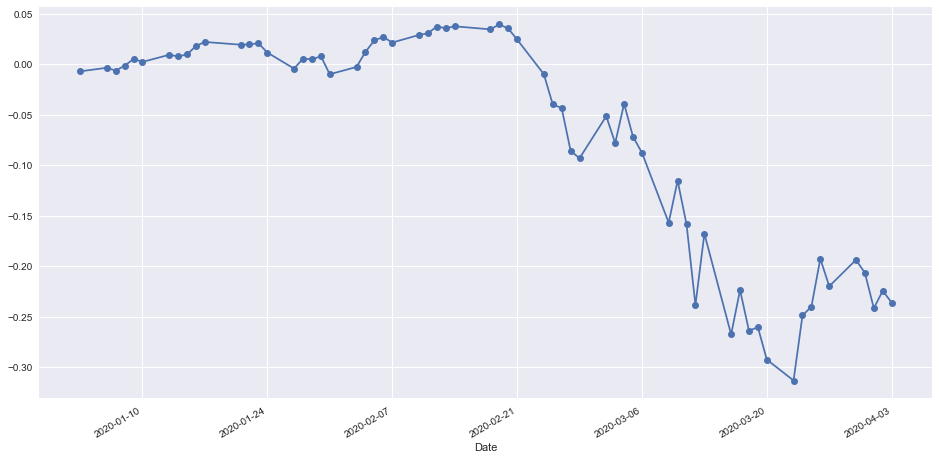

In [109]:
default_plot_params = {
    'style': 'o-',
    'figsize': (16, 8)
}

def plot_cumprod(df, plot_params=default_plot_params):
    ((1 + df['return'].dropna()).cumprod()-1).plot(**plot_params)

plot_cumprod(universe['^GSPC'])

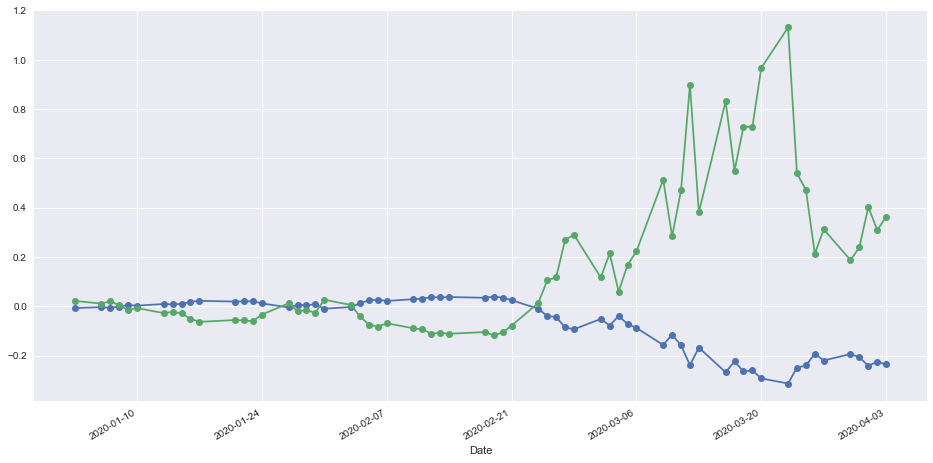

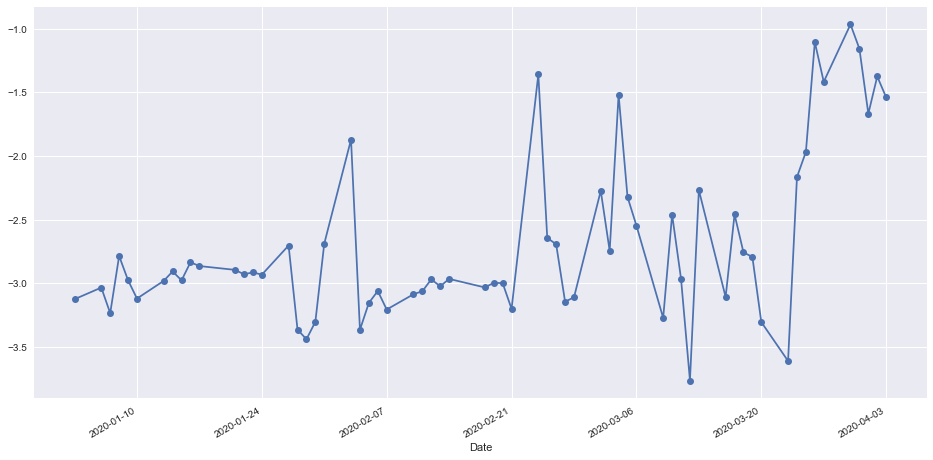

In [137]:
def plot_cumprod(dfs, plot_params=default_plot_params):
    print dfs
    for df in dfs:
        ((1 + df['return'].dropna()).cumprod()-1).plot(**plot_params)


def plot_cumprod(s1, s2=None, plot_params=default_plot_params):
    _s1 = ((1 +  s1['return'].dropna()).cumprod()-1)
    _s1.plot(**default_plot_params)
    
    if s2 is not None:
        _s2 = ((1 +  s2['return'].dropna()).cumprod()-1)
        _s2.plot(**default_plot_params)
        
        plt.figure()
        (_s2 / _s1).plot(**default_plot_params)
        

plot_cumprod(universe['^GSPC'], universe['SPXU'])

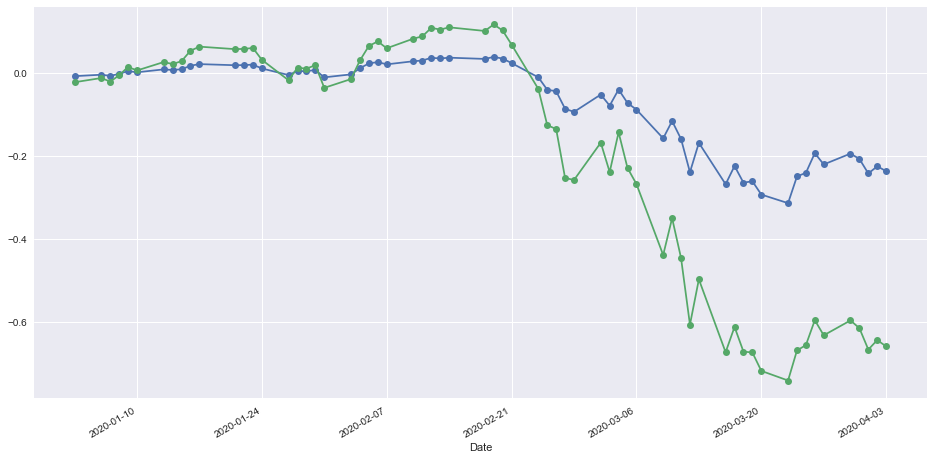

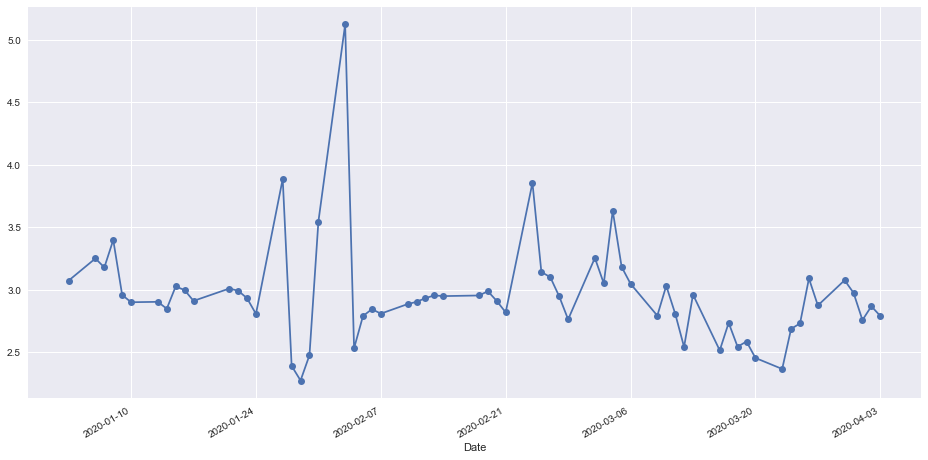

In [138]:
plot_cumprod(universe['^GSPC'], universe['UPRO'])

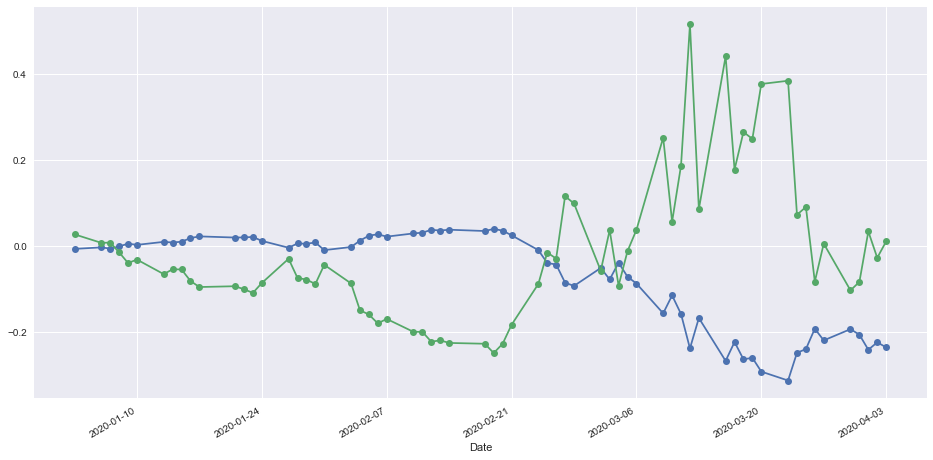

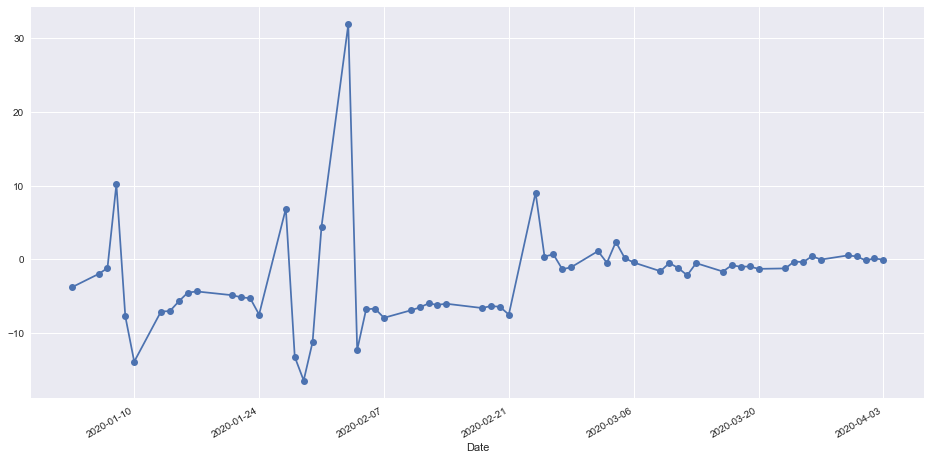

In [140]:
plot_cumprod(universe['^GSPC'], universe['SQQQ'])

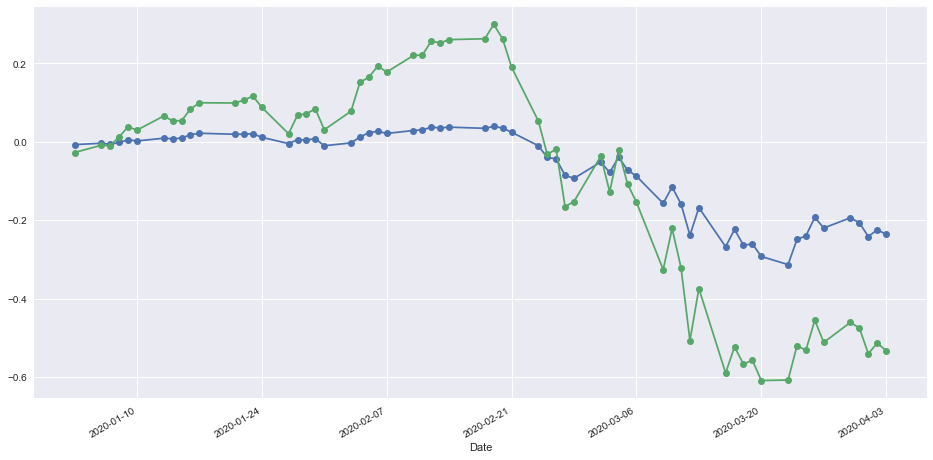

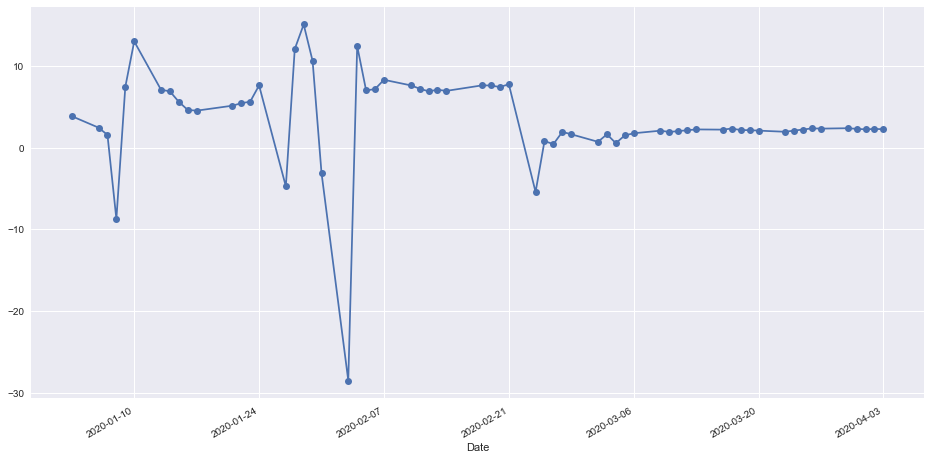

In [141]:
plot_cumprod(universe['^GSPC'], universe['TQQQ'])

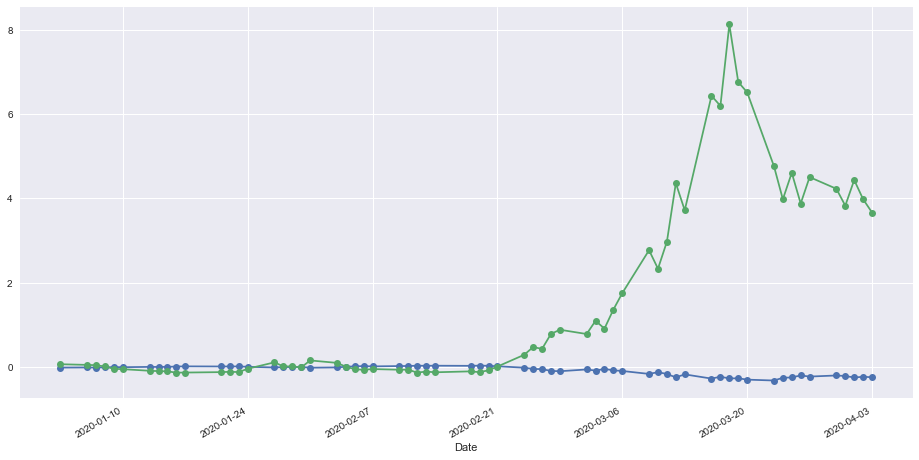

In [127]:
plot_cumprod(universe['^GSPC'], universe['UVXY'])